In [41]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
param = pybamm.ParameterValues("Chen2020")
# param = pybamm.ParameterValues("ORegan2022")
# param

In [42]:
# param['Initial inner SEI thickness [m]'] = 0.5e-12
# param['Initial outer SEI thickness [m]'] = 0.5e-12
# param['Inner SEI open-circuit potential [V]'] = 0.3

In [43]:

cycle_no = 1
exp_CCCV = pybamm.Experiment(
    [("Charge at C/10 until 4.2 V",
      "Rest for 10 hours",
      "Discharge at C/2 until 2.5 V",
      )] * cycle_no
)

In [44]:
from os import name


sei_models = ["interstitial-diffusion limited"]

# sei_models = ["reaction limited", "solvent-diffusion limited", "interstitial-diffusion limited"]
# sei_models = ["ec reaction limited", "reaction limited"]
# Diffferent SEI models can be used, by setting the index of sei_models


name_models = ["SPM"]
models_SPM = [pybamm.lithium_ion.SPM(options={
    "SEI": sei_models[index],
    "SEI porosity change": "true",
},
    name="SPM " + sei_models[index]) for index in range(len(sei_models))
]

In [45]:
# models_SPM[0].variable_names()

In [46]:
# please note that the size of sims will be equal to the number of models times the number of experiments
solver = pybamm.CasadiSolver(mode="safe")
sims_SPM = [pybamm.Simulation(model, parameter_values=param,
                              experiment=exp_CCCV, solver=solver) for model in models_SPM]

Combine all solutions for the different SEI modesl in DFN and SPM and models in the list 'sols' Odd =DFN and Evens = SPM (unifrm diffusion in the particle)

In [47]:
sols_SPM = [sim.solve(initial_soc=0) for sim in sims_SPM]

In [48]:
# Vaiables to be postprocessed, you can add as many as output variables to the following list
# you can find the list variables to be be output by typing model name dot varaible_name() e.g. here, models[0].variable_names()
out_vars = [  # 'X-averaged negative particle surface concentration [mol.m-3]',
    # "Voltage [V]",
    'X-averaged SEI thickness [m]',
    # 'Total capacity lost to side reactions [A.h]',
    # 'Loss of lithium to SEI [mol]',
    # 'X-averaged inner SEI thickness [m]',
    # 'X-averaged outer SEI thickness [m]',
    # 'X-averaged negative electrode porosity',
]

# Label for the output variables y-axis in the plots
yaxis_labels = ["SEI_thickness",
                'Total capacity lost to side reactions [A.h]', 'Total lithium in particles', 'X-averaged inner SEI thickness [m]',
                'X-averaged outer SEI thickness [m]',]

In [49]:

# from matplotlib import lines

# for sol in sols_SPM:  # loop through the solutions of the DFN models
#     LS_cycles = [sol.cycles[k].steps[2]['X-averaged SEI thickness [m]'].entries[-1]
#                  for k in range(cycle_no)]
#     plt.scatter(np.arange(1, cycle_no+1), LS_cycles,
#                 label=models_SPM[sols_SPM.index(sol)].name)
# plt.xlabel("Cycle number")
# plt.ylabel("SEI thickness [m]")
# plt.legend()
# plt.show()

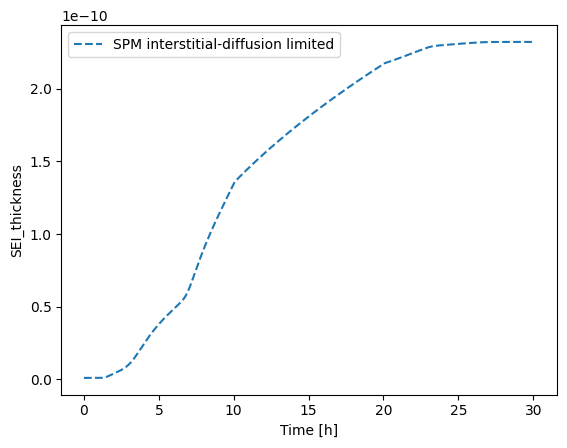

In [50]:
from matplotlib import lines


for out_var in out_vars:  # Loop through the output variables
    for sol in sols_SPM:  # loop through the solutions of the SPM models
        plt.plot(sol['Time [h]'].entries, sol[out_var].entries,
                 linestyle='--',
                 label=models_SPM[sols_SPM.index(sol)].name)

    plt.xlabel("Time [h]")
    plt.ylabel(yaxis_labels[out_vars.index(out_var)])
    plt.legend()
    plt.show()